In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re  
# Read the CSV file into a DataFrame and display the first 20 rows
file = "C:\\Users\\DELL\\Desktop\\CS-652 Text Based Analysis\\Datasets\\amazon_reviews.csv"
df = pd.read_csv(file)
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0


# 1.Use regex to remove stop words

In [2]:
#display the coloumns of the dataset
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

In [3]:
#display the types of dataset
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object

In [4]:
#display the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [5]:
#data description
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [6]:
#checking for null values
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [7]:
df['reviewText'] = df['reviewText'].fillna('')

In [8]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [9]:
# Download the stopwords corpus, load English stopwords, and print them
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'other', 'too', 'so', 'both', 'o', 'doing', 'she', 'an', 'my', "don't", "shan't", "couldn't", 'it', 'and', 'can', 'than', 'its', "she's", 'this', 'where', 'm', 'herself', 'mustn', 'but', 'in', 'aren', 'ours', 'when', 'yourself', 'hadn', "mustn't", 'these', 'own', 'needn', 'wasn', 'shan', 'any', 'did', 'should', 'there', 'very', 'does', "you've", 'through', 'no', "it's", 'are', 'the', 'on', 'not', 'hasn', "needn't", 'haven', 'him', 'couldn', 'why', 'such', 'd', "isn't", 'or', 'into', 'how', 'theirs', 'about', 'myself', 'shouldn', "wouldn't", 'itself', 'all', 'were', 'once', 'had', 'll', 'don', 'up', 'most', 'been', 's', 'is', 'we', 'they', 'whom', 'while', 'himself', 'again', 'against', 'under', 'didn', 'with', 'below', 'down', 'further', 'themselves', "hadn't", "should've", 'at', 'them', 'me', 'am', 'weren', 'their', 'yourselves', 'what', 'ourselves', 'by', 'i', "that'll", 'then', 't', 'from', "you're", "aren't", 'until', 'during', 'a', 'nor', 'he', 'ma', 'ain', 'between', 'having', "

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk.corpus import stopwords

In [11]:
# Define a function to remove stopwords using regex
def remove_stopwords_regex(text):
    stop_words = set(stopwords.words('english'))
    # Construct a regex pattern to match stopwords
    pattern = r'\b(?:{})\b'.format('|'.join(stop_words))
    # Use regex to remove stopwords from the text
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    return cleaned_text

# Test the function with some sample text
sample_text = "This is a sample text containing some stopwords such as 'the' and 'is'."
cleaned_text = remove_stopwords_regex(sample_text)
print("Original text:")
print(sample_text)
print("\nText after removing stopwords using regex:")
print(cleaned_text)


Original text:
This is a sample text containing some stopwords such as 'the' and 'is'.

Text after removing stopwords using regex:
   sample text containing  stopwords   ''  ''.


In [12]:
# Apply the function to the appropriate column of the DataFrame
df['clean_text'] = df['reviewText'].apply(remove_stopwords_regex)

# Display the DataFrame with the cleaned text
print(df[['reviewText', 'clean_text']].head(20))

                                           reviewText  \
0                                          No issues.   
1   Purchased this for my device, it worked as adv...   
2   it works as expected. I should have sprung for...   
3   This think has worked out great.Had a diff. br...   
4   Bought it with Retail Packaging, arrived legit...   
5   It's mini storage.  It doesn't do anything els...   
6   I have it in my phone and it never skips a bea...   
7   It's hard to believe how affordable digital ha...   
8   Works in a HTC Rezound.  Was running short of ...   
9   in my galaxy s4, super fast card, and am total...   
10  I like this SD Card because it can take music ...   
11  It works, but file writes are a bit slower tha...   
12      THE NAME OF ITSELF SPEAKS OUT. GO SANDISK GO!   
13  Solid SDHC card that is fast (at reading and w...   
14  Heard that the card's write speed is insuffici...   
15  I bought this to use with my go pro hero 3 bla...   
16  got this because i had a 2 

# 2.statistical operations

In [13]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4915 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
 12  clean_text      4915 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 499.3+ KB
None


In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
clean_text        0
dtype: int64


In [15]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           overall  unixReviewTime     day_diff  helpful_yes   total_vote
count  4915.000000    4.915000e+03  4915.000000  4915.000000  4915.000000
mean      4.587589    1.379465e+09   437.367040     1.311089     1.521465
std       0.996845    1.581857e+07   209.439871    41.619161    44.123095
min       1.000000    1.339200e+09     1.000000     0.000000     0.000000
25%       5.000000    1.365898e+09   281.000000     0.000000     0.000000
50%       5.000000    1.381277e+09   431.000000     0.000000     0.000000
75%       5.000000    1.392163e+09   601.000000     0.000000     0.000000
max       5.000000    1.406074e+09  1064.000000  1952.000000  2020.000000


In [16]:
# Extract the 'overall' column
ratings = df['overall']

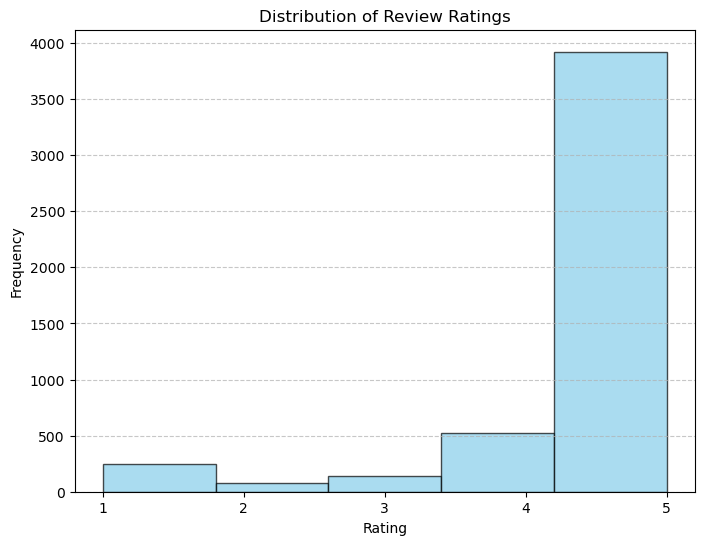

In [17]:
# Plot a histogram of review ratings distribution
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Set x-axis ticks to range from 1 to 5 (ratings scale)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

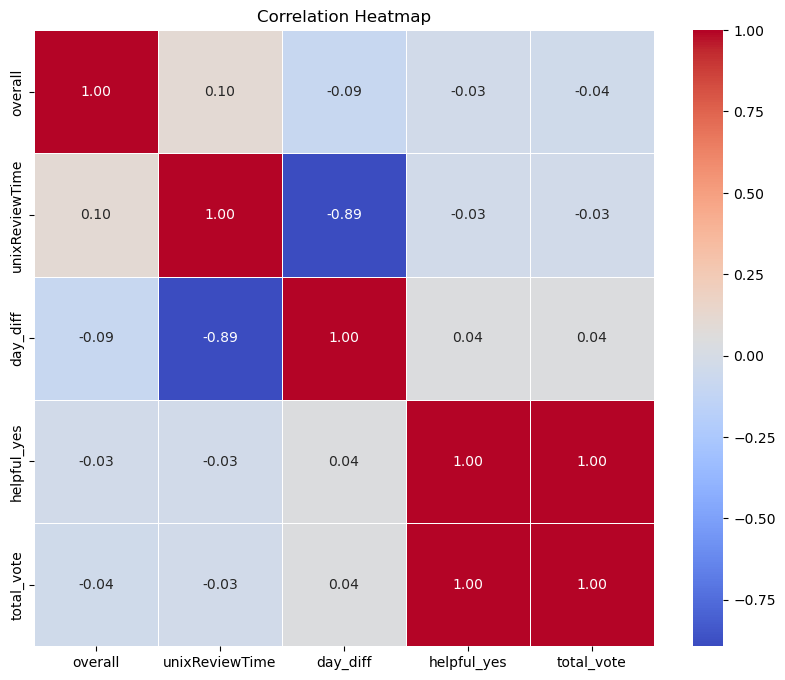

In [18]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


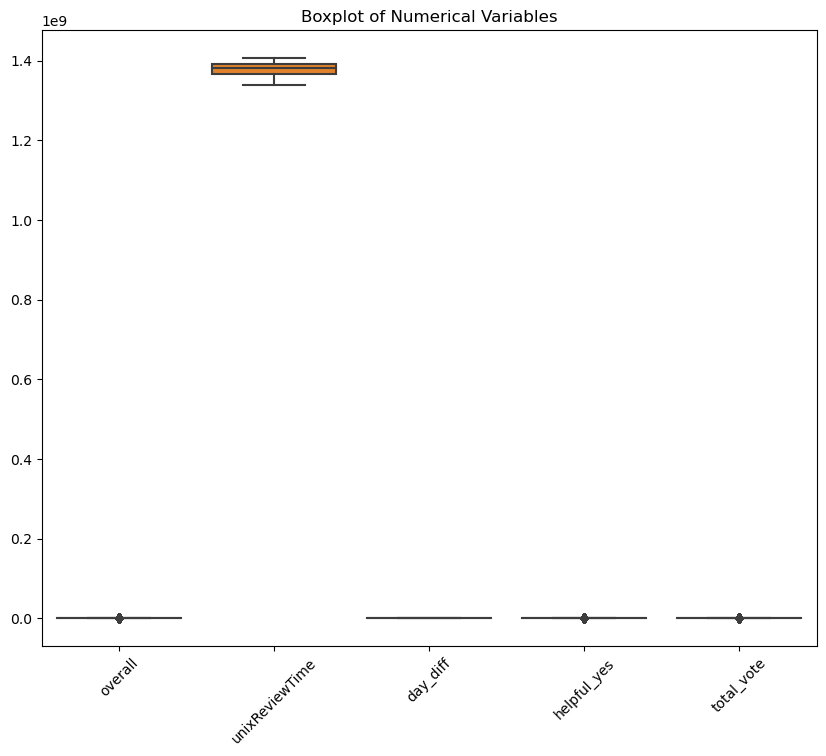

In [19]:
# Boxplot for numerical variables
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

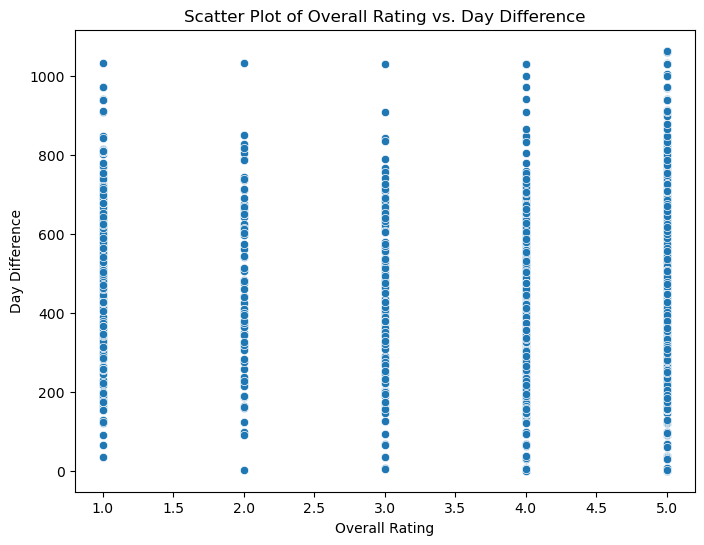

In [20]:
# Scatter plot of two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='overall', y='day_diff', data=df)
plt.title('Scatter Plot of Overall Rating vs. Day Difference')
plt.xlabel('Overall Rating')
plt.ylabel('Day Difference')
plt.show()


# 3.Create pipeline, remove stop words, word frequency analysis and wordclouds.

In [21]:
# Download the stopwords corpus, load English stopwords, and print them
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'other', 'too', 'so', 'both', 'o', 'doing', 'she', 'an', 'my', "don't", "shan't", "couldn't", 'it', 'and', 'can', 'than', 'its', "she's", 'this', 'where', 'm', 'herself', 'mustn', 'but', 'in', 'aren', 'ours', 'when', 'yourself', 'hadn', "mustn't", 'these', 'own', 'needn', 'wasn', 'shan', 'any', 'did', 'should', 'there', 'very', 'does', "you've", 'through', 'no', "it's", 'are', 'the', 'on', 'not', 'hasn', "needn't", 'haven', 'him', 'couldn', 'why', 'such', 'd', "isn't", 'or', 'into', 'how', 'theirs', 'about', 'myself', 'shouldn', "wouldn't", 'itself', 'all', 'were', 'once', 'had', 'll', 'don', 'up', 'most', 'been', 's', 'is', 'we', 'they', 'whom', 'while', 'himself', 'again', 'against', 'under', 'didn', 'with', 'below', 'down', 'further', 'themselves', "hadn't", "should've", 'at', 'them', 'me', 'am', 'weren', 'their', 'yourselves', 'what', 'ourselves', 'by', 'i', "that'll", 'then', 't', 'from', "you're", "aren't", 'until', 'during', 'a', 'nor', 'he', 'ma', 'ain', 'between', 'having', "

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Define a pipeline for text preprocessing: convert to lowercase, tokenize, and remove stopwords
import regex as re
def tokenize(reviewText):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', reviewText)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [23]:
# Define a function to preprocess text using a given pipeline
def prepare(text, pipeline):
    if isinstance(text, str):
        tokens = text
        for fun in pipeline:
            tokens = fun(tokens)
        return tokens
    else:
        return ""  # or any other handling for non-string inputs
# Apply the text preprocessing function to the 'reviewText' column using the defined pipeline
df['tokens'] = df['reviewText'].apply(prepare, pipeline=pipeline)

In [24]:
# Count the frequency of tokens in the 'tokens' column, filter out those with frequency less than 1, and display the top 10 frequent tokens.
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
card,4712
phone,1776
works,1585
great,1480
memory,1372
sandisk,1335
sd,1212
use,1124
one,1096


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

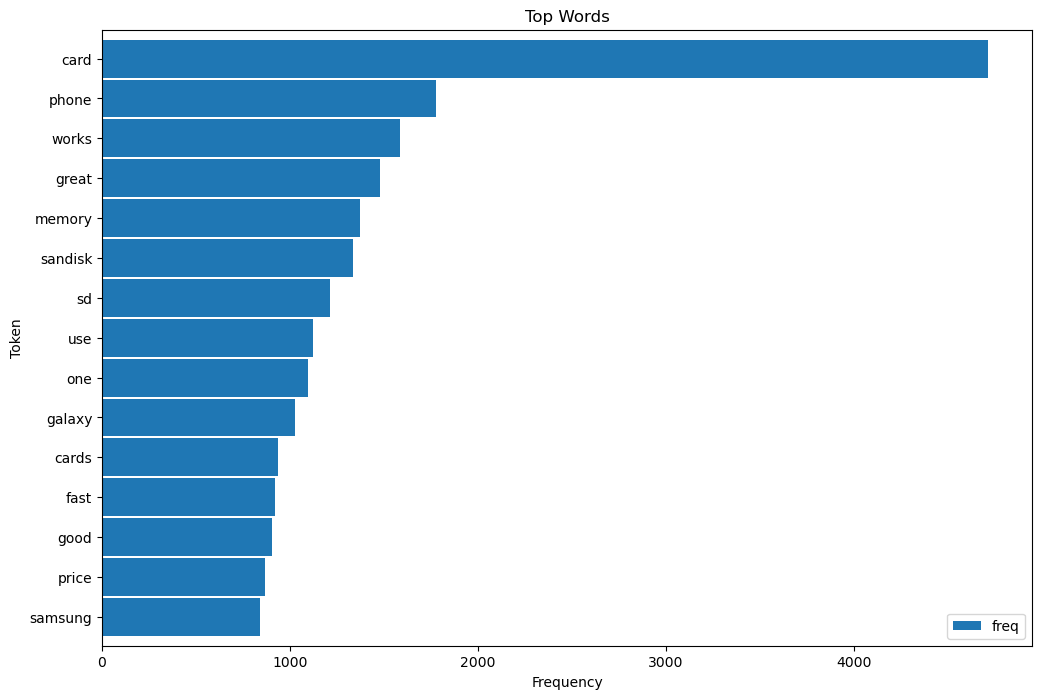

In [25]:
# Plot the top 15 most frequent tokens as a horizontal bar chart
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
# Invert the y-axis to show the highest values at the top
ax.invert_yaxis()
# Set labels and title for the chart
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [26]:
# Import necessary libraries for creating word clouds and visualizing them.
from wordcloud import WordCloud
from matplotlib import pyplot as plt

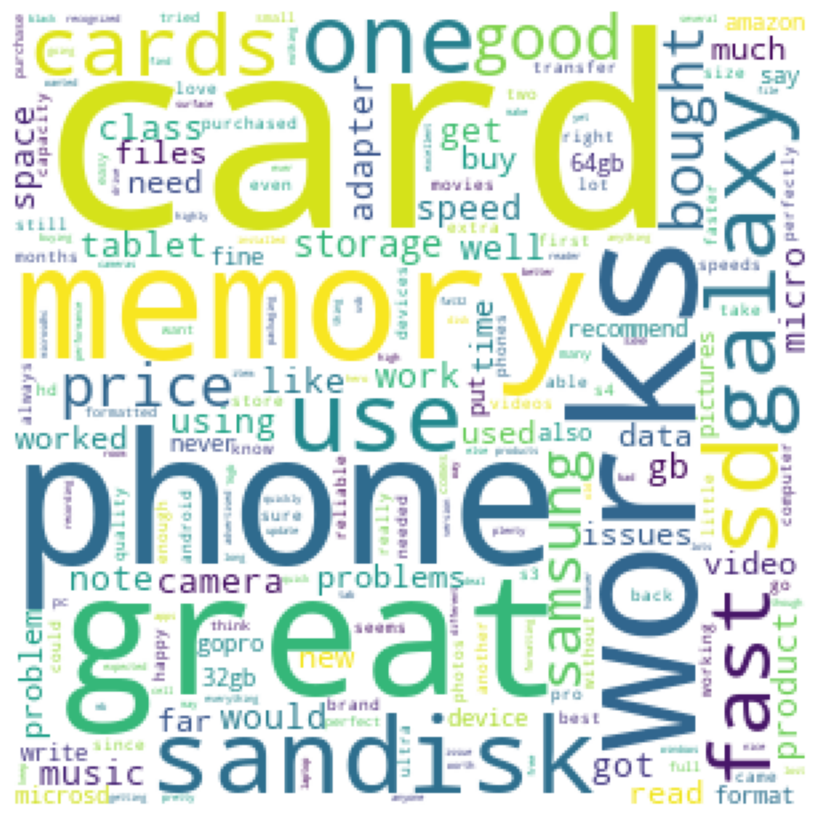

In [50]:
# Create a WordCloud object with specified parameters and fit it with word frequencies.
# Create a matplotlib figure for displaying the word cloud and show it.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 4.write regex to identify them and sort, provide an exampleand result of the regex for each string

In [28]:
import re

# 1. Variable Name
variable_name_pattern = r'\b[a-zA-Z_][a-zA-Z0-9_]*\b'
variable_name_example = 'my_variable123'
variable_name_result = re.findall(variable_name_pattern, variable_name_example)
print("Variable Name Example:")
print("Input:", variable_name_example)
print("Regex Pattern:", variable_name_pattern)
print("Result:", variable_name_result)
print()



Variable Name Example:
Input: my_variable123
Regex Pattern: \b[a-zA-Z_][a-zA-Z0-9_]*\b
Result: ['my_variable123']



In [29]:
# 2. File Path
file_path_pattern = r'^(\/?[\w\-.]+\/?)+$'
file_path_example = '/home/user/Documents/file.txt'
file_path_result = re.findall(file_path_pattern, file_path_example)
print("File Path Example:")
print("Input:", file_path_example)
print("Regex Pattern:", file_path_pattern)
print("Result:", file_path_result)
print()



File Path Example:
Input: /home/user/Documents/file.txt
Regex Pattern: ^(\/?[\w\-.]+\/?)+$
Result: ['file.txt']



In [30]:
# 3. Email Address
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
email_example = 'john.doe@example.com'
email_result = re.findall(email_pattern, email_example)
print("Email Address Example:")
print("Input:", email_example)
print("Regex Pattern:", email_pattern)
print("Result:", email_result)
print()


Email Address Example:
Input: john.doe@example.com
Regex Pattern: \b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b
Result: ['john.doe@example.com']



In [31]:

# 4. Date Format
date_pattern = r'\b\d{1,2}/\d{1,2}/\d{2,4}\b'
date_example = '04/27/2024'
date_result = re.findall(date_pattern, date_example)
print("Date Format Example:")
print("Input:", date_example)
print("Regex Pattern:", date_pattern)
print("Result:", date_result)
print()


Date Format Example:
Input: 04/27/2024
Regex Pattern: \b\d{1,2}/\d{1,2}/\d{2,4}\b
Result: ['04/27/2024']



In [32]:

# 5. Phone Number
phone_pattern = r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b'
phone_example = '123-456-7890'
phone_result = re.findall(phone_pattern, phone_example)
print("Phone Number Example:")
print("Input:", phone_example)
print("Regex Pattern:", phone_pattern)
print("Result:", phone_result)


Phone Number Example:
Input: 123-456-7890
Regex Pattern: \b\d{3}[-.]?\d{3}[-.]?\d{4}\b
Result: ['123-456-7890']


# 5.Sentiment analysis

In [53]:
!pip install textblob

In [35]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [36]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['reviewText'].apply(getSubjectivity)
df['Polarity'] = df['reviewText'].apply(getPolarity)

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,clean_text,tokens,Subjectivity,Polarity
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,issues.,[issues],0.000,0.000000
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,"Purchased device, worked advertised. ne...","[purchased, device, worked, advertised, never,...",0.200,0.200000
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,works expected. sprung higher capacity....,"[works, expected, sprung, higher, capacity, th...",0.525,0.129167
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,think worked great. diff. bran 64gb card ...,"[think, worked, great, diff, bran, 64gb, card,...",0.550,0.000000
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,"Bought Retail Packaging, arrived legit, or...","[bought, retail, packaging, arrived, legit, or...",0.360,0.386667


In [37]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,clean_text,tokens,Subjectivity,Polarity,Insight
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,issues.,[issues],0.000000,0.000000,Neutral
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,"Purchased device, worked advertised. ne...","[purchased, device, worked, advertised, never,...",0.200000,0.200000,Positive
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,works expected. sprung higher capacity....,"[works, expected, sprung, higher, capacity, th...",0.525000,0.129167,Positive
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,think worked great. diff. bran 64gb card ...,"[think, worked, great, diff, bran, 64gb, card,...",0.550000,0.000000,Neutral
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,"Bought Retail Packaging, arrived legit, or...","[bought, retail, packaging, arrived, legit, or...",0.360000,0.386667,Positive
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0,' mini storage. ' anything else ' suppose...,"[mini, storage, anything, else, supposed, purc...",0.700000,-0.025000,Negative
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0,phone never skips beat. File transfers...,"[phone, never, skips, beat, file, transfers, s...",0.630952,0.233333,Positive
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,' hard believe affordable digital become. 3...,"[hard, believe, affordable, digital, become, g...",0.339583,0.085417,Positive
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1,Works HTC Rezound. running short space ...,"[works, htc, rezound, running, short, space, 6...",0.450000,0.100000,Positive
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0,"galaxy s4, super fast card, totally happy,...","[galaxy, s4, super, fast, card, totally, happy...",0.816667,0.233333,Positive


In [39]:
# Import necessary libraries
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

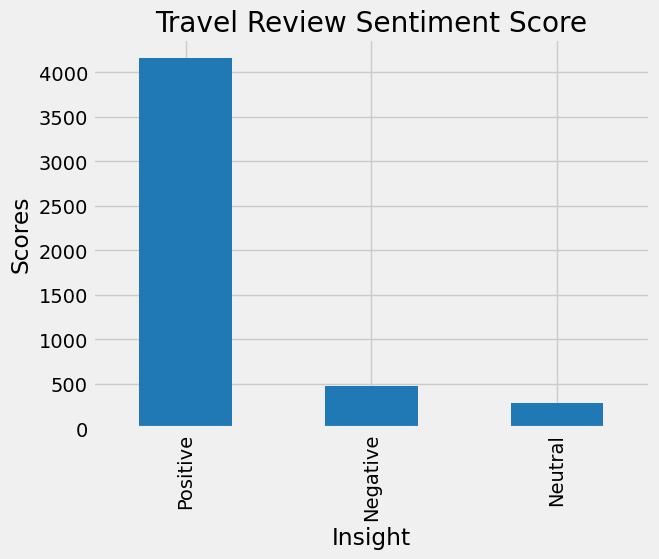

In [40]:
# Plot the values count of sentiment
plt.title("Travel Review Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()